In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

import scipy

# Creación de animaciones con matplotlib

Consiste en crear una función que vaya generando gráficas diferentes para cada fotograma.

Los pasos son:

* Generar los datos de las gráficas
* Generar gráficas vacías
* Ir dibujando gráficas diferentes en función del número de fotograma 'i'

Lo veremos con un ejemplo

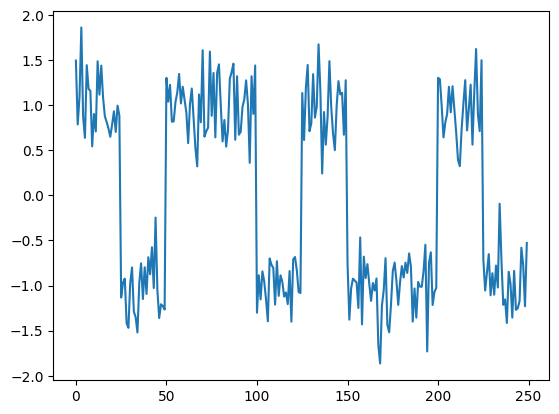

In [3]:
# Creación de una señal

A=np.array([1,-1,1,1,-1,1,-1,-1,1,-1])
D=25
amplitudes=np.repeat(A,D)
amplitudesr=amplitudes+np.random.randn(len(amplitudes))*0.3
_=plt.plot(amplitudesr)

Iremos dibujando dos gráficas. 
* En la superior irán aparenciendo bloques de muestras en rojo, que se convertirán en azules en el fotograma siguiente
* En la inferior dibujaremos la amplitud en el instante central de cada bloque

In [6]:
# Instantes y amplitudes para la gráfica superior
t = np.arange(len(amplitudesr))
amplitudes = amplitudesr


# Instantes y amplitudes para la gráfica inferior
ts=t[D//2::D]
As=amplitudesr[D//2::D]


# Crear figura y cambiar los ejes para que no cambien en cada fotograma
Amax=2.5
fig, axes = plt.subplots(2,1)
# Fijar los ejes de la gráfica. Permanecen en la animación
axes[0].axis([0,250,-Amax,Amax])
axes[1].axis([0,250,-Amax,Amax])
# HAcer que ambas gráficas tengan "grid"
axes[0].xticks=np.arange(0,250,25)
axes[0].grid()
axes[1].grid()



# Dibujamos las partes de la gráfica superior sin datos
l1, = axes[0].plot([],[],'r') # Lo nuevo que aparece en cada paso en rojo
l2, = axes[0].plot([],[],'b') # Lo que apareció en pasos anteriores en azul
l3, = axes[0].plot([],[],'k--') # El cursor punteado en negro
l4, = axes[0].plot([],[],'*k',markersize=13) # El asterisco indicando el valor de la muestra

#Idem con la gráfica inferior
l5, = axes[1].plot([],[],'ob') # Dibujaremos un punto azul en el instante adecuado y con  la amplitud correcta


# Función para generar gráfica del instante i
def animate(i): 
    ini=D*i
    fin=D*(i+1)
    l2.set_data(t[:ini+1], amplitudesr[:ini+1])
    l1.set_data(t[ini:fin], amplitudesr[ini:fin])
    l3.set_data([D//2+i*D,D//2+i*D], [-Amax,Amax])
    l4.set_data(ts[i:i+1], As[i:i+1])
    l5.set_data(ts[:i+1], As[:i+1])

ani=matplotlib.animation.FuncAnimation(fig=fig, func=animate, frames=10,interval=1000)
_=plt.close() # Esta línea evita se quede en el cuaderno el primer fotograma


In [7]:
# Con esto sacamos el visor de la animación creada
HTML(ani.to_jshtml())

In [8]:
# Guardar animación en un gif animado

# Hay opciones para guardar en un vídeo pero requiere tener instalado ffmpeg
ani.save("muestreo.gif")

In [ ]:
### BEGIN TESTS
assert True
### END TESTS